# <b>Exploratory Data Analysis in LOTR Data

In [1]:
import os
import sys
sys.path.insert(0, '../')
import pandas as pd
import numpy as np
import seaborn as sea
from nltk import FreqDist, word_tokenize
from wordcloud import WordCloud
sea.set(style="white", context="notebook")
custom_color = 'skyblue'
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_rows', None)
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

## <b> `Load Data`

In [2]:
data_char = pd.read_csv('../data/processed/lotr_characters.csv', index_col=False)
data_scripts = pd.read_csv('../data/processed/lotr_scripts.csv', index_col=False)

In [3]:
data_char.head()

,birth,death,gender,name,race
0,ta 2978,february 26 3019,male,boromir,men
1,ta 280,ta 515,male,tarcil,men
2,sa 2709,sa 2962,male,aradûnakhôr,men
3,yt,fa 455,male,angrod,elves
4,sa 3219,sa 3440,male,anárion,men


## <b> `Visualization (Character)`

### <b>Gender

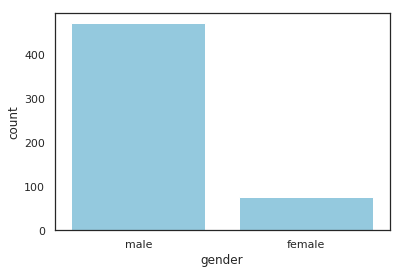

In [4]:
fig = sea.countplot(data_char['gender'], color=custom_color)

### <b>Race

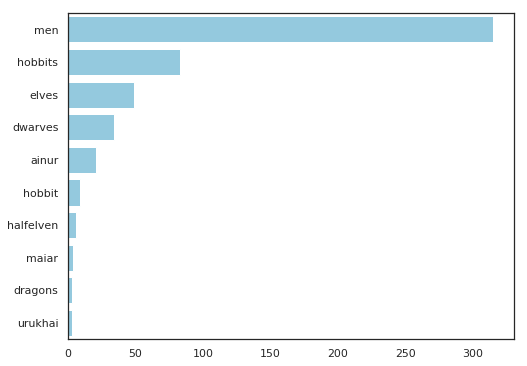

In [5]:
races = data_char['race'].value_counts()[0:10]
fig = plt.figure(figsize=(8, 6))
fig = sea.barplot(y = races.index, x = races.values, color=custom_color)

### <b>`Visualization (Movies)`

### <b>Character

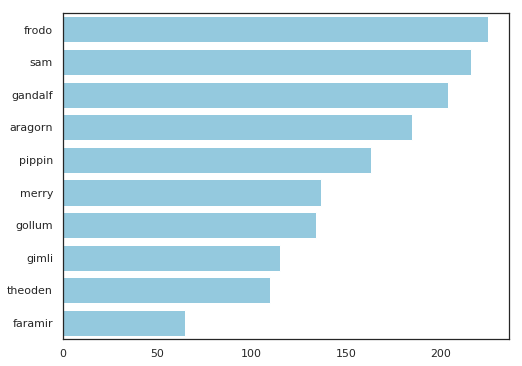

In [6]:
char = data_scripts['char'].value_counts()[0:10]
fig = plt.figure(figsize=(8, 6))
fig = sea.barplot(y = char.index, x = char.values, color=custom_color)

# <b> Linguistic Features with SpaCy

In [7]:
data_scripts.head()

,char,dialog,movie
0,deagol,oh smeagol ive got one! ive got a fish smeagol smeagol!,the return of the king
1,smeagol,pull it in! go on go on go on pull it in!,the return of the king
2,deagol,arrghh!,the return of the king
3,smeagol,deagol!,the return of the king
4,smeagol,deagol!,the return of the king


In [8]:
data_scripts['char'].unique()

array(['deagol', 'smeagol', 'gollum', 'frodo', 'merry', 'gimli', 'sam',
       'gandalf', 'aragorn', 'pippin', 'hobbit', 'rosie', 'bilbo',
       'treebeard', 'saruman', 'theoden', 'galadril', 'elrond', 'grima',
       'frodo voice over', 'witch king', 'eowyn', 'faramir', 'orc',
       '\xa0gandalf', 'soldiers on gate', 'gothmog', 'general', 'captain',
       'soldier', 'mouth of sauron', 'eomer', 'army', 'boson',
       'mercenary', 'eowynmerry', 'denethor', 'rohirrim',
       'galadriel voiceover', 'legolas', 'galadriel', 'king of the dead',
       'grimbold', 'irolas', 'orcs', 'gamling', 'madril', 'damrod',
       'soldiers', 'soldiers in minas tirith', 'gandalf voiceover',
       'soldier 1', 'soldier 2', 'woman', 'haldir', 'sam voiceover',
       'old man', 'boromir', 'crowd', 'arwen', 'elrond voiceover',
       'arwen voiceover', 'aragorn ', 'hama', 'sharku', 'people', 'lady',
       'freda', 'morwen', 'eye of sauron', 'rohan stableman', 'gorbag',
       'argorn', 'gandalf voice 

## <b> `Aragorn  Analysis ` 

In [9]:
character_name = 'aragorn'

## <b> Part of Speech Tagging 

In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), 
also called grammatical tagging is the process of marking up a word in a text (corpus) 
as corresponding to a particular part of speech, based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs...


    ADJ: adjective
    ADP: adposition
    ADV: adverb
    AUX: auxiliary verb
    CONJ: coordinating conjunction
    DET: determiner
    INTJ: interjection
    NOUN: noun
    NUM: numeral
    PART: particle
    PRON: pronoun
    PROPN: proper noun
    PUNCT: punctuation
    SCONJ: subordinating conjunction
    SYM: symbol
    VERB: verb
    X: other


In [10]:
def discover_features_from_characteres(nlp_text, tag):
    features = []
    for token in nlp_text:
        if  token.pos_ in tag:
            features.append(token.text)
    return FreqDist(word_tokenize(' '.join(features)))

In [11]:
def plot_word_clouds_from_frequencies(frequencies):
    wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(frequencies)
    fig = plt.figure(figsize = (12, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    fig.savefig('../reports/figures/char.png')

#### <b> Creating NLP sentence to be used in Linguistic Analysis

In [12]:
sentences = nlp(data_scripts[data_scripts['char'] == character_name]['dialog'].to_string(index=False))

#### <b> Spoken Verbs

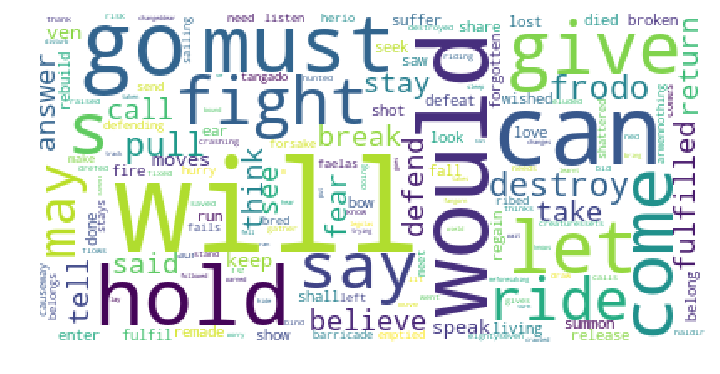

In [13]:
features = discover_features_from_characteres(sentences, ['VERB'])
plot_word_clouds_from_frequencies(features)

In [14]:
' '.join(features)

'belong let rebuild may share bow show come done go will enter fire shot ear believe fear look suffer summon fulfil remade regain say hold fulfilled fight release living run break lost defeat must ride would call answer forgotten broken shall return love can give seek wished saw stay said fall defend died defending tell make barricade meet need hurry faelas tangado ribed causeway herio emptied bred destroy send aur stays arwennothing belongs sailing left re think pull listen see take fails forsake shattered comes crashing bid stand riding speak risk s doing thinks saved went thank eightyseven destroyed drefed raised seen gives creaturessets lit calls know m needs draw gather frodo keep fixed moves hunted eluded haldir ven move flows ned bind meforesaking track taken hide wield legolas lay crawled bound cut ran followed fangorn wait put fell worry knows disturb trying bring turn takes hear goes changeddear changes sleep warned ve learnt'

#### <b> Spoken Nouns

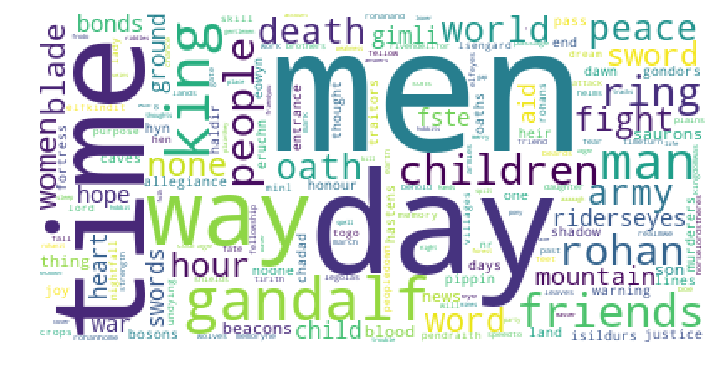

In [15]:
features = discover_features_from_characteres(sentences, ['NOUN'])
plot_word_clouds_from_frequencies(features)

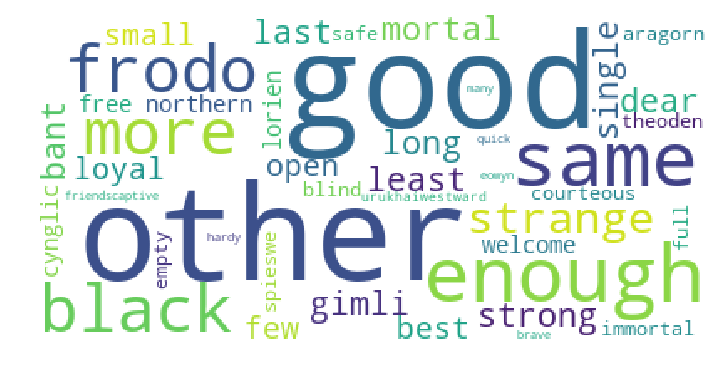

In [16]:
features = discover_features_from_characteres(sentences, ['ADJ'])
plot_word_clouds_from_frequencies(features)

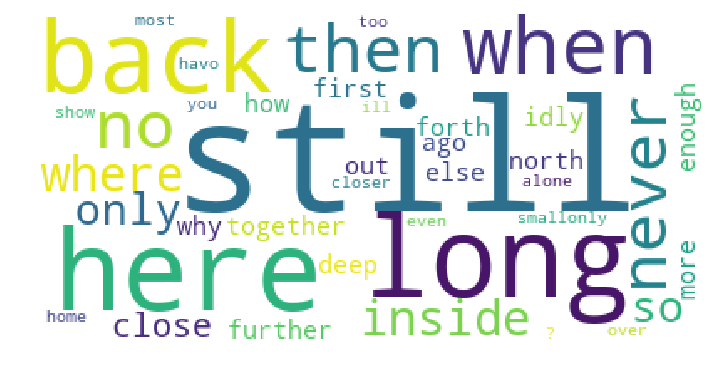

In [17]:
features = discover_features_from_characteres(sentences, ['ADV'])
plot_word_clouds_from_frequencies(features)

## <b> Dependency Parsing

Noun chunks are “base noun phrases” – flat phrases that have a noun as their head


`Text: The original noun chunk text.
Root text: The original text of the word connecting the noun chunk to the rest of the parse.
Root dep: Dependency relation connecting the root to its head.
Root head text: The text of the root token’s head.`

acl- clausal modifier of noun (adjectival clause)

acomp - adjectival complement

advcl-adverbial clause modifier

advmod-adverbial modifier

agent-agent

amod-adjectival modifier

appos-appositional modifier

attr-attribute

aux-auxiliary

auxpass-auxiliary (passive)

case-case marking

cc-coordinating conjunction

ccomp-clausal complement

compound-compound

conj-conjunct

cop-copula

csubj-clausal subject

csubjpass-clausal subject (passive)

dative-dative

dep-unclassified dependent

det-determiner

dobj-direct object

expl-expletive

intj-interjection

mark-marker

meta-meta modifier

neg-negation modifier

nn-noun compound modifier

nounmod-modifier of nominal

npmod-noun phrase as adverbial modifier

nsubj-nominal subject

nsubjpass-nominal subject (passive)

nummod-numeric modifier

oprd-object predicate

obj-object

obl-oblique nominal

parataxis-parataxis

pcomp-complement of preposition

pobj-object of preposition

poss-possession modifier

preconj-pre-correlative conjunction

prep-prepositional modifier

prt-particle

punct-punctuation

quantmod-modifier of quantifier

relcl-relative clause modifier

root-root

xcomp-open clausal complement


In [18]:
slice_sentence = sentences[0:28]
print(slice_sentence)

this day does not belong to one man but to all let us together rebuild     this world that we may share in the days of peace  
                                                                                                                                                                                                                                                                                                                                      


In [19]:
for chunk in slice_sentence.noun_chunks:
    print(chunk.text, '|', chunk.root.text, '|', chunk.root.dep_, '|', chunk.root.head.text)

one man | man | pobj | to
us | us | nsubj | rebuild
we | we | nsubj | share
the days | days | pobj | in
peace | peace | pobj | of


`Text: The original token text.
Dep: The syntactic relation connecting child to head.
Head text: The original text of the token head.
Head POS: The part-of-speech tag of the token head.
Children: The immediate syntactic dependents of the token.`

In [20]:
for token in slice_sentence:
    print(token.text, '|', token.dep_, '|', token.head.text, '|', token.head.pos_,'|',
          [child for child in token.children])

this | det | day | NOUN | []
day | npadvmod | belong | VERB | [this]
does | aux | belong | VERB | []
not | neg | belong | VERB | []
belong | ROOT | belong | VERB | [day, does, not, to, but, let]
to | prep | belong | VERB | [man]
one | nummod | man | NOUN | []
man | pobj | to | ADP | [one]
but | cc | belong | VERB | []
to | prep | let | VERB | [all]
all | pobj | to | PART | []
let | conj | belong | VERB | [to, rebuild]
us | nsubj | rebuild | VERB | []
together | advmod | rebuild | VERB | []
rebuild | ccomp | let | VERB | [us, together,     , world, share]
     |  | rebuild | VERB | []
this | det | world | NOUN | []
world | npadvmod | rebuild | VERB | [this]
that | dobj | share | VERB | []
we | nsubj | share | VERB | []
may | aux | share | VERB | []
share | ccomp | rebuild | VERB | [that, we, may, in]
in | prep | share | VERB | [days]
the | det | days | NOUN | []
days | pobj | in | ADP | [the, of]
of | prep | days | NOUN | [peace]
peace | pobj | of | ADP | [ 
                            

In [21]:
displacy.render(slice_sentence, style='dep')

## <b> Name Entity Recognition

`Text: The original entity text.
Start: Index of start of entity in the Doc.
End: Index of end of entity in the Doc.
Label: Entity label, i.e. type.`

PERSON-People, including fictional.

NORP-Nationalities or religious or political groups.

FAC-Buildings, airports, highways, bridges, etc.

ORG-Companies, agencies, institutions, etc.

GPE-Countries, cities, states.

LOC-Non-GPE locations, mountain ranges, bodies of water.

PRODUCT-Objects, vehicles, foods, etc. (Not services.)

EVENT-Named hurricanes, battles, wars, sports events, etc.

WORK_OF_ART-Titles of books, songs, etc.

LAW	Named documents made into laws.

LANGUAGE-Any named language.

DATE-Absolute or relative dates or periods.

TIME-Times smaller than a day.

PERCENT-Percentage, including ”%“.

MONEY-Monetary values, including unit.

QUANTITY-Measurements, as of weight or distance.

ORDINAL-“first”, “second”, etc.

CARDINAL-Numerals that do not fall under another type.

In [22]:
print(slice_sentence)

this day does not belong to one man but to all let us together rebuild     this world that we may share in the days of peace  
                                                                                                                                                                                                                                                                                                                                      


In [23]:
for ent in slice_sentence.ents:
    print(ent.text, '|', ent.start_char, '|', ent.end_char, '|', ent.label_)

this day | 0 | 8 | DATE
one | 28 | 31 | CARDINAL
the days | 107 | 115 | DATE


In [24]:
displacy.render(slice_sentence, style="ent")

### <b> Accessing entity annotations

`IOB Scheme`

    I – Token is inside an entity.
    O – Token is outside an entity.
    B – Token is the beginning of an entity.

In [25]:
# document level
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in slice_sentence.ents]
print(ents)

[('this day', 0, 8, 'DATE'), ('one', 28, 31, 'CARDINAL'), ('the days', 107, 115, 'DATE')]


In [26]:
# token level
ent_0 = [slice_sentence[0].text, slice_sentence[0].ent_iob_, slice_sentence[0].ent_type_]
ent_1 = [slice_sentence[1].text, slice_sentence[1].ent_iob_, slice_sentence[1].ent_type_]

In [27]:
ent_0

['this', 'B', 'DATE']

In [28]:
ent_1

['day', 'I', 'DATE']

## <b> KnowledgeBase

A storage class for entities and aliases of a specific knowledge base (ontology)

## <b> Special Tokenization

In [29]:
from spacy.symbols import ORTH
elvish = nlp('erello endorenna utlien sinome maruvan ar hildinyar tenn ambarmetta!' )

In [30]:
print([w.text for w in elvish]) 

['erello', 'endorenna', 'utlien', 'sinome', 'maruvan', 'ar', 'hildinyar', 'tenn', 'ambarmetta', '!']


In [31]:
# Add special case rule
special_case = [{ORTH: "end"}, {ORTH: "orenna"}]
nlp.tokenizer.add_special_case("endorenna", special_case)

In [32]:
# Check new tokenization
print([w.text for w in nlp('endorenna')]) 

['end', 'orenna']


## <b> Special Annotation

In [33]:
from spacy.tokens import Doc
from spacy.lang.en import English

In [34]:
spaces = Doc(nlp.vocab, words=["Hello", ",", "world", "!"], spaces=[False, True, False, True])
print(spaces.text)

Hello, world! 


## <b>Merging and splitting

### <b>`Merging` 

In [35]:
slice_sentence = nlp(str(slice_sentence))

In [36]:
print("Before:", [(token.text, token.i) for token in slice_sentence])

Before: [('this', 0), ('day', 1), ('does', 2), ('not', 3), ('belong', 4), ('to', 5), ('one', 6), ('man', 7), ('but', 8), ('to', 9), ('all', 10), ('let', 11), ('us', 12), ('together', 13), ('rebuild', 14), ('    ', 15), ('this', 16), ('world', 17), ('that', 18), ('we', 19), ('may', 20), ('share', 21), ('in', 22), ('the', 23), ('days', 24), ('of', 25), ('peace', 26), ('\xa0\n                                                                                                                                                                                                                                                                                                                                      ', 27)]


In [37]:
with slice_sentence.retokenize() as retokenizer:
    retokenizer.merge(slice_sentence[24:27], attrs={"LEMMA": "days of peace"})
print("After:", [token.text for token in slice_sentence])

After: ['this', 'day', 'does', 'not', 'belong', 'to', 'one', 'man', 'but', 'to', 'all', 'let', 'us', 'together', 'rebuild', '    ', 'this', 'world', 'that', 'we', 'may', 'share', 'in', 'the', 'days of peace', '\xa0\n                                                                                                                                                                                                                                                                                                                                      ']


## <b> Sentence Segmentation

In [38]:
for sent in slice_sentence.sents:
    print(sent.text)

this day does not belong to one man but to all let us together rebuild     this world that we may share in the days of peace  
                                                                                                                                                                                                                                                                                                                                      


In [39]:
print("Before:", [sent.text for sent in slice_sentence.sents])

Before: ['this day does not belong to one man but to all let us together rebuild     this world that we may share in the days of peace \xa0\n                                                                                                                                                                                                                                                                                                                                      ']


In [40]:
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == "this":
            doc[token.i+1].is_sent_start = True
    return doc

In [41]:
nlp.add_pipe(set_custom_boundaries, before="parser")

In [42]:
print("After:", [sent.text for sent in slice_sentence.sents])

After: ['this day does not belong to one man but to all let us together rebuild     this world that we may share in the days of peace \xa0\n                                                                                                                                                                                                                                                                                                                                      ']
